# Universal Approximation Theorem
Purpose: This demo illustrates the theorem for the piecewise-constant (Heaviside block) basis.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Complicated Function to Model

In [4]:
def f(x):
    return np.sin(2.*np.pi*x) + x**2 + 2.*(np.exp(-30.*(x-0.6)**2) - np.exp(-30.*((x-0.6)/3.)**2))

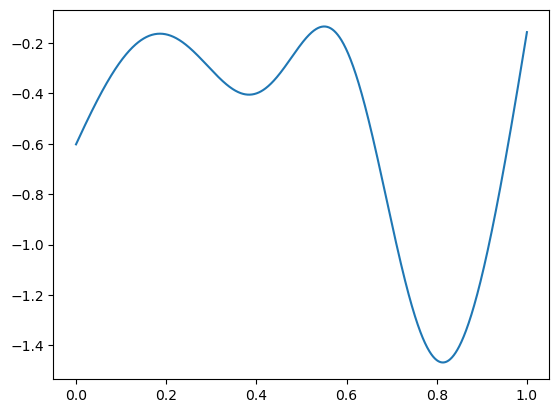

In [20]:
xx = np.linspace(0, 1, 1000)
plt.plot(xx, f(xx));

## Split domain into Intervals

In [6]:
b = np.arange(0, 1, 0.1)
print(b)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [7]:
v = f(b)
print(v)

[-0.60234762 -0.270305   -0.16577643 -0.3061689  -0.40017296 -0.20279576
 -0.22778525 -0.91385228 -1.45901473 -1.12501067]


In [8]:
# A piecewise constant function
def _G(x, v, b):
    g = v[0]
    idx = 1
    while idx<len(b) and x>b[idx]:
        #print(idx)
        g = v[idx]
        idx +=1
    return g

def G(x, v, b):
    '''
     y = G(x, v, b)
     
     Samples the piecewise constant function defined by the
     values in v at breakpoints in b.
     
     Inputs:
      x   array of x-values
      v   array of constant piece values
      b   array of breakpoints (the left of each piece)
          Note: len(v)=len(b)
    '''
    val = [_G(y, v, b) for y in x]
    return np.array(val)

## Fit $f(x)$ with a piecewise constant function

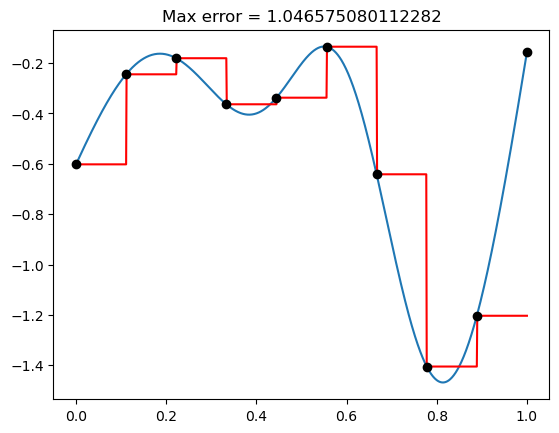

In [9]:
b = np.linspace(0,1,10)
plt.plot(xx, f(xx))
plt.plot(xx, G(xx, f(b), b), 'r');
plt.plot(b, f(b), 'ko')
max_diff = np.max(abs(G(xx, f(b), b)-f(xx)))
plt.title('Max error = '+str(max_diff));

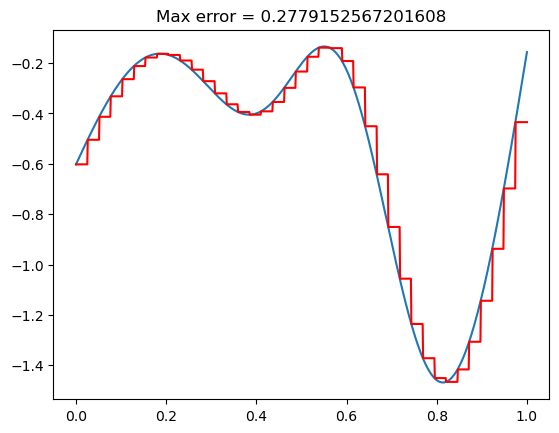

In [10]:
b = np.linspace(0,1,40)
plt.plot(xx, f(xx))
plt.plot(xx, G(xx, f(b), b), 'r');
max_diff = np.max(abs(G(xx, f(b), b)-f(xx)))
plt.title('Max error = '+str(max_diff));

## Adaptive partitioning
This method chooses the width of the pieces to guarantee error is less than $\varepsilon$.

In [11]:
def find_interval(f, x, eps):
    '''
     delta = find_interval(f, x, eps)
     Find the step delta s.t.
      | f(x) - f(x+delta) | < eps
    '''
    delta = 1.
    v = f(x)
    err = np.max(np.abs(v-f(np.linspace(x, x+delta, 100))))
    while err >= eps:
        delta *= 0.98
        err = np.max(np.abs(v-f(np.linspace(x, x+delta, 100))))
    
    return delta

def build_approx(f, domain, eps):
    '''
     v, b = build_approx(f, domain, eps)
     Find a piecewise constant approximation to f that is
     within eps of f at all points.
    '''
    x = domain[0]  # left side
    b = [x]
    v = [f(x)]
    while x<domain[1]:
        b.append(b[-1]+find_interval(f, x, eps))
        v.append(f(b[-1]))
        x = b[-1]
    b[-1] = domain[1]
    v[-1] = f(b[-1])
    return v, b

In [21]:
eps = 0.1
v, b = build_approx(f, [-1, 1], eps)
print(f'{len(b)} pieces')

72 pieces


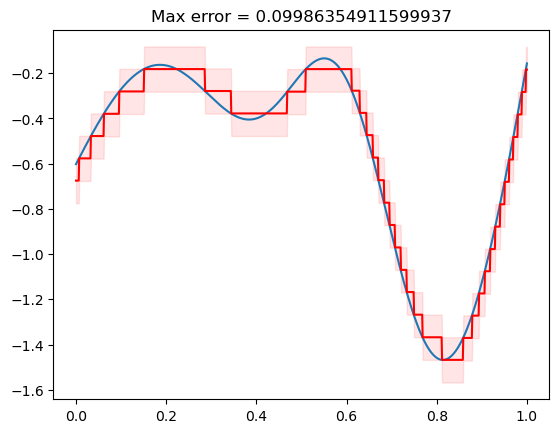

In [22]:
plt.plot(xx, f(xx))
plt.plot(xx, G(xx, v, b), 'r');
plt.fill_between(xx, G(xx, v, b)-eps, G(xx, v, b)+eps, color=(1,0,0,0.1))
#plt.plot(xx, G(xx, v, b)+eps, color=(1,0,0,0.2));
#plt.plot(xx, G(xx, v, b)-eps, color=(1,0,0,0.2));
max_diff = np.max(abs(G(xx, v, b)-f(xx)))
plt.title('Max error = '+str(max_diff));
plt.savefig('piecewise_approx.pdf')

### A trickier function

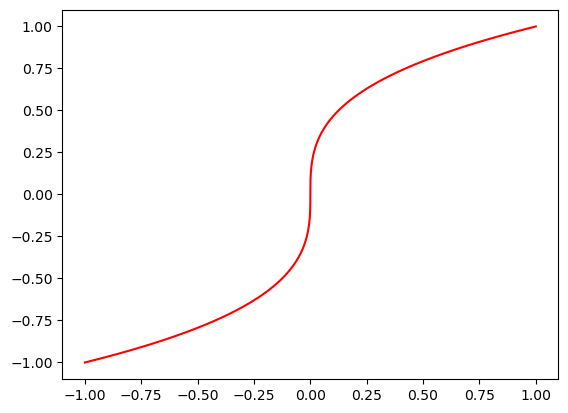

In [14]:
xx = np.linspace(-1,1,5000)
inv_cubic = (lambda x: np.sign(x)*abs(x)**(1./3))
plt.plot(xx, inv_cubic(xx), 'r');

In [15]:
eps = 0.03
v, b = build_approx(inv_cubic, [xx[0], xx[-1]], eps)
print(f'{len(b)} pieces')

69 pieces


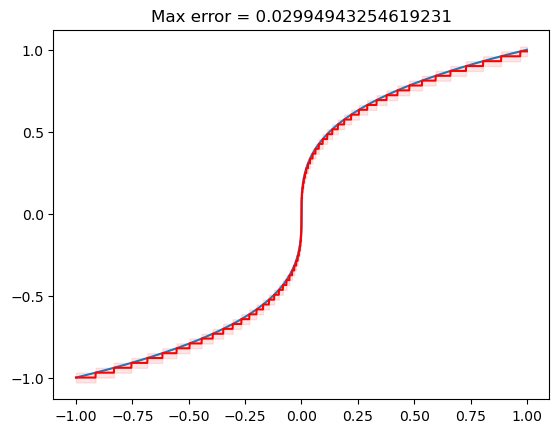

In [16]:
plt.plot(xx, inv_cubic(xx))
plt.plot(xx, G(xx, v, b), 'r');
plt.fill_between(xx, G(xx, v, b)-eps, G(xx, v, b)+eps, color=(1,0,0,0.1))
max_diff = np.max(abs(G(xx, v, b)-inv_cubic(xx)))
plt.title('Max error = '+str(max_diff));

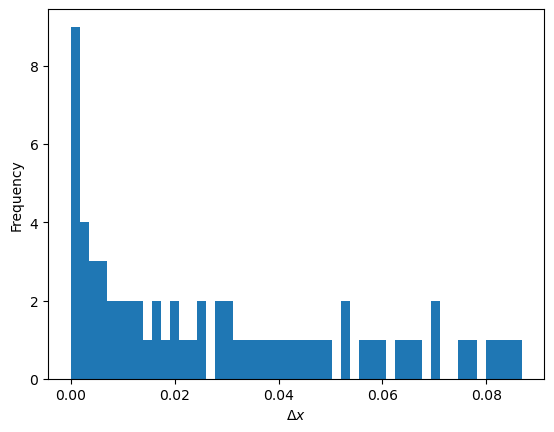

In [17]:
plt.hist(abs(np.diff(b)), bins=50);
plt.xlabel(r'$\Delta x$'); plt.ylabel('Frequency');